In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import matplotlib.pyplot as plt
import datetime

In [2]:

# ROAD MAP:
# 1.State the question and determine required data
# 2.Acquire the data in an accessible format
# 3.Identify and correct missing data points/anomalies as required
# 4.Prepare the data for the machine learning model
# 5.Establish a baseline model that you aim to exceed
# 6.Train the model on the training data
# 7.Make predictions on the test data
# 8.Compare predictions to the known test set targets and calculate performance metrics
# 9.If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
# 10.Interpret model and report results visually and numerically


In [3]:
# Read in data and display first 5 rows

features = pd.read_csv('Survey-results-2018.csv')
features.head(5)

,G,A,E,I,PCR1,PCR2,PCR3,PCR4,PCR5,PEU1,...,CE2,CE3,CE4,CE5,UC2,UC3,UC4,UC5,BAI2,BAI3
0,1,3,4,3,5,5,5,5,3,4,...,1,3,4,3,4,4,2,2,2,1
1,1,2,1,1,2,3,4,5,4,4,...,4,4,3,4,4,3,2,2,4,3
2,1,2,2,2,1,1,3,1,3,4,...,1,3,2,5,4,3,2,5,3,5
3,1,4,4,1,5,5,5,5,3,3,...,5,5,3,5,2,3,3,3,3,3
4,2,2,4,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
features = features.drop(['E', 'I'], axis=1)

In [5]:
print('The shape of our features is:', features.shape)

The shape of our features is: (308, 24)


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G       308 non-null    int64
 1   A       308 non-null    int64
 2   PCR1    308 non-null    int64
 3   PCR2    308 non-null    int64
 4   PCR3    308 non-null    int64
 5   PCR4    308 non-null    int64
 6   PCR5    308 non-null    int64
 7   PEU1    308 non-null    int64
 8   PEU2    308 non-null    int64
 9   PEU3    308 non-null    int64
 10  PEU4    308 non-null    int64
 11  PEU5    308 non-null    int64
 12  PEU6    308 non-null    int64
 13  CE1     308 non-null    int64
 14  CE2     308 non-null    int64
 15  CE3     308 non-null    int64
 16  CE4     308 non-null    int64
 17  CE5     308 non-null    int64
 18  UC2     308 non-null    int64
 19  UC3     308 non-null    int64
 20  UC4     308 non-null    int64
 21  UC5     308 non-null    int64
 22  BAI2    308 non-null    int64
 23  BAI3    308 non

In [7]:
# Descriptive statistics for each column

features.describe()

,G,A,PCR1,PCR2,PCR3,PCR4,PCR5,PEU1,PEU2,PEU3,...,CE2,CE3,CE4,CE5,UC2,UC3,UC4,UC5,BAI2,BAI3
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.00000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1.275974,2.714286,3.772727,3.707792,3.870130,3.461039,3.282468,3.87987,3.435065,3.590909,...,3.698052,2.743506,3.350649,2.753247,2.629870,2.990260,2.948052,2.915584,2.740260,3.295455
std,0.447731,0.946203,1.437165,1.438989,1.415141,1.542590,1.370258,1.14510,0.883621,1.077539,...,1.322468,1.405824,1.316557,1.456477,1.369521,1.009678,1.038617,1.067441,1.162975,1.234828
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.00000,3.000000,3.000000,...,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.250000,5.00000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# One-hot encode the data using pandas get_dummies

features = pd.get_dummies(features)

In [9]:
# Labels are the values we want to predict

labels = np.array(features['BAI2'])

In [10]:
# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop('BAI2', axis = 1)

In [11]:
# Saving feature names for later use

feature_list = list(features.columns)

In [12]:
# Convert to numpy array

features = np.array(features)

In [13]:
# Split the data into training and testing sets

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (231, 23)
Training Labels Shape: (231,)
Testing Features Shape: (77, 23)
Testing Labels Shape: (77,)


In [15]:
# The baseline predictions are the historical averages

baseline_preds = test_features[:, feature_list.index('BAI3')]

In [16]:
# Baseline errors, and display average baseline error

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.82


In [17]:
baseline_preds = test_features[:, feature_list.index('PCR1')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  1.75


In [18]:
baseline_preds = test_features[:, feature_list.index('PCR2')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1.6


In [19]:
baseline_preds = test_features[:, feature_list.index('PCR3')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1.62


In [20]:
baseline_preds = test_features[:, feature_list.index('PCR5')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1.26


In [21]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [22]:
# Train the model on training data

rf.fit(train_features, train_labels);

In [23]:
# Use the forest's predict method on the test data

predictions = rf.predict(test_features)

In [24]:
# Calculate the absolute errors

errors = abs(predictions - test_labels)

In [25]:
# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.18 degrees.


In [26]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / test_labels)

In [27]:
# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.05 %.


In [28]:
# Pull out one tree from the forest

# tree = rf.estimators_[5]

In [29]:
# Export the image to a dot file

# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [30]:
# Use dot file to create a graph

# (graph, ) = pydot.graph_from_dot_file('tree.dot')

In [31]:
# Write graph to a png file

# graph.write_png('tree.png')

In [32]:
# # Limit depth of tree to 3 levels

# rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
# rf_small.fit(train_features, train_labels)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [33]:
# # Extract the small tree

# tree_small = rf_small.estimators_[5]

In [34]:
# # Save the tree as a png image

# export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');

In [35]:
# Get numerical feature importances

importances = list(rf.feature_importances_)

In [36]:
# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [37]:
# Sort the feature importances by most important first

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [38]:
# #############################################################################################################################

In [39]:
# Print out the feature and importances

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BAI3                 Importance: 0.18
Variable: PEU6                 Importance: 0.12
Variable: CE2                  Importance: 0.06
Variable: UC2                  Importance: 0.06
Variable: A                    Importance: 0.05
Variable: PEU1                 Importance: 0.05
Variable: CE3                  Importance: 0.05
Variable: CE1                  Importance: 0.04
Variable: CE5                  Importance: 0.04
Variable: UC5                  Importance: 0.04
Variable: PCR2                 Importance: 0.03
Variable: PCR4                 Importance: 0.03
Variable: PCR5                 Importance: 0.03
Variable: PEU2                 Importance: 0.03
Variable: PEU3                 Importance: 0.03
Variable: PEU4                 Importance: 0.03
Variable: CE4                  Importance: 0.03
Variable: G                    Importance: 0.02
Variable: PCR1                 Importance: 0.02
Variable: PEU5                 Importance: 0.02
Variable: UC3                  Importanc

In [40]:
# New random forest with only the two most important variables

rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [41]:
# Extract the two most important features

important_indices = [feature_list.index('BAI3'), feature_list.index('PEU6')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [42]:
# Train the random forest

rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [43]:
# Make predictions and determine the error

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [44]:
# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors), 2), 'BAI3.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.72 BAI3.
Accuracy: 66.87 %.


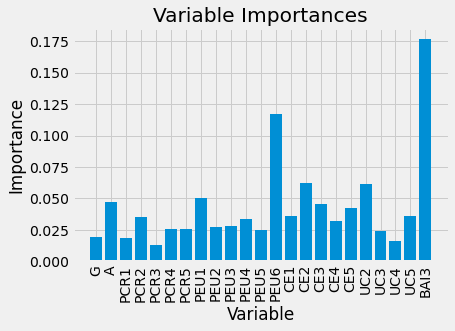

In [45]:
#%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [46]:
# # Dates of training values
# months = features[:, feature_list.index('month')]
# days = features[:, feature_list.index('day')]
# years = features[:, feature_list.index('year')]

# # List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# # Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# # Dates of predictions
# months = test_features[:, feature_list.index('month')]
# days = test_features[:, feature_list.index('day')]
# years = test_features[:, feature_list.index('year')]

# # Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# # Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# # Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

In [47]:
# # Plot the actual values
# plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# # Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60');
# plt.legend()

# # Graph labels
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [48]:
# # Make the data accessible for plotting
# true_data['USE1'] = features[:, feature_list.index('USE1')]
# true_data['USE2'] = features[:, feature_list.index('USE2')]
# true_data['USE3'] = features[:, feature_list.index('USE3')]

# # Plot all the data as lines
# plt.plot(true_data['date'], true_data['USE1'], 'b-', label  = 'USE1', alpha = 1.0)
# plt.plot(true_data['date'], true_data['EOU1'], 'y-', label  = 'EOU1', alpha = 1.0)
# plt.plot(true_data['date'], true_data['BI1'], 'k-', label = 'BI1', alpha = 0.8)
# plt.plot(true_data['date'], true_data['ATT1'], 'r-', label = 'ATT1', alpha = 0.3)

# # Formatting plot
# plt.legend(); plt.xticks(rotation = '60');

# # Lables and title
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');